<a href="https://colab.research.google.com/github/pranitha-pedapudi/codediversify/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#get the stock tickers in the portfolio
assets = ["AMD", "NFLX", "AAPL", "GOOG"]

In [ ]:
# Assign weights to the stocks
weights = np.array([0.25, 0.25, 0.25, 0.25])  # Equal weights for simplicity

In [ ]:
# Assign start and end dates
stockStartDate = '2015-01-01'
today = datetime.today().strftime('%Y-%m-%d')
today

'2024-05-03'

In [ ]:
# Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

# Store the adjusted close price of the sock into the df
for stock in assets:
  df[stock] = yf.download(stock,start=stockStartDate,end=today)['Adj Close']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


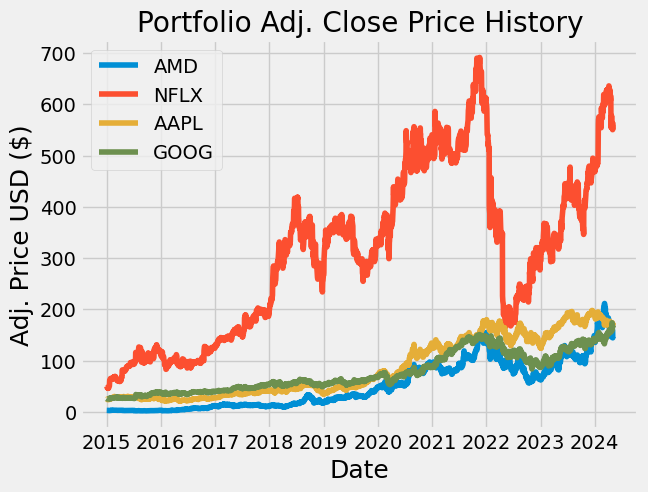

In [ ]:
# Visual representation of the stocks or the portfolio
title = 'Portfolio Adj. Close Price History'

# Create and plot the graph
for c in df.columns.values:
    plt.plot(df[c], label=c)

plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Price USD ($)', fontsize=18)
plt.legend(df.columns.values, loc='upper left')
plt.show()

**Historical Portfolio Performance Visualization:**

This plot shows the historical adjusted closing prices of the stocks in the portfolio over time.
Each line represents the price movement of a particular stock.
It provides a visual representation of how the portfolio has performed in the past.

In [ ]:
# show the daily simple return
returns = df.pct_change()
returns

,AMD,NFLX,AAPL,GOOG
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.003745,-0.050897,-0.028172,-0.020846
2015-01-06,-0.011278,-0.017121,0.000094,-0.023177
2015-01-07,-0.019011,0.005192,0.014022,-0.001713
2015-01-08,0.011628,0.022188,0.038422,0.003153
...,...,...,...,...
2024-04-26,0.023673,-0.006321,-0.003473,0.099652
2024-04-29,0.017789,-0.003100,0.024808,-0.033335
2024-04-30,-0.011361,-0.015818,-0.018271,-0.019416


In [ ]:
# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,AMD,NFLX,AAPL,GOOG
AMD,0.354269,0.089696,0.072447,0.065340
NFLX,0.089696,0.198976,0.054344,0.058647
AAPL,0.072447,0.054344,0.083008,0.050666
GOOG,0.065340,0.058647,0.050666,0.082427


In [ ]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.09381006506155787

In [ ]:
# Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.30628428797696733

In [ ]:
# Calculate the annual portfolio return
portfolio_simple_annual_return = np.sum(returns.mean()*weights)*252
portfolio_simple_annual_return

0.3642785438306502

In [ ]:
# Sow the expected annual return, volatility (risk), and variance
percent_var = str(round(port_variance,2)*100)+'%'
percent_vola = str(round(port_volatility,2)*100)+'%'
percent_ret = str(round(portfolio_simple_annual_return,2)*100)+'%'
print('Expected annual return: '+percent_ret)
print('Annual volatility/ risk: '+percent_vola)
print('Annual variance: '+percent_var)

Expected annual return: 36.0%
Annual volatility/ risk: 31.0%
Annual variance: 9.0%


**Portfolio Metrics:**

**Expected Annual Return:** This is the average annual return that the portfolio is expected to generate based on historical data. It represents the mean return of the portfolio over a year.


**Annual Volatility (Risk):** This is the standard deviation of the portfolio's returns over a year. It measures the degree of variation or dispersion of the portfolio's returns from its average.

**Annual Variance:** This is the square of the annual volatility. It quantifies the dispersion of returns around the portfolio's mean return.

In [ ]:
pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [ ]:
# Portfolio Optimization

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

In [ ]:
# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AMD', 0.32181), ('NFLX', 0.14849), ('AAPL', 0.29893), ('GOOG', 0.23076)])
Expected annual return: 33.8%
Annual volatility: 31.8%
Sharpe Ratio: 1.00


(0.3378306520417936, 0.3176995483643331, 1.0004126656085457)

**Optimized Portfolio Weights:**

These are the optimized weights assigned to each stock in the portfolio, calculated to maximize the Sharpe ratio.
The weights represent the proportion of the portfolio's total value allocated to each stock.
They indicate how much of the portfolio's capital is invested in each stock.

In [ ]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value = 50000)

allocation,leftover = da.lp_portfolio()
print('Discrete allocation: ',allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'AMD': 110, 'NFLX': 13, 'AAPL': 86, 'GOOG': 69}
Funds remaining: $71.13


**Discrete Allocation of Funds:**

This output shows the discrete allocation of funds to each stock in the portfolio based on the optimized weights and the total portfolio value.
It specifies the number of shares to be purchased for each stock to achieve the optimized allocation.
It also indicates the funds remaining after the allocation, which can be used for further investments or held as cash.

In [ ]:
# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)


In [ ]:
# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)

In [ ]:
# Create a new instance of EfficientFrontier before calling max_sharpe()
ef_new = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef_new.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)

<Axes: xlabel='Volatility', ylabel='Return'>

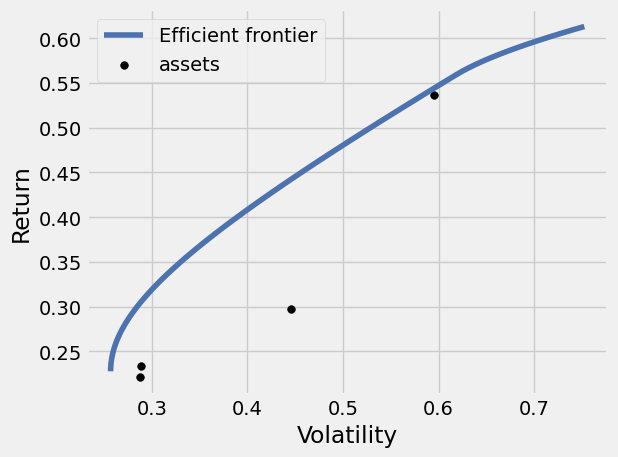

In [ ]:
# Plot efficient frontier
plotting.plot_efficient_frontier(ef)

**Efficient Frontier Plot:**

This plot represents the efficient frontier, which is a set of optimal portfolios that offer the highest expected return for a given level of risk (volatility).
The efficient frontier curve shows the trade-off between risk and return for different portfolio allocations.
It helps investors visualize the risk-return profile of various portfolios and select the optimal portfolio based on their risk tolerance and return objectives.

In [ ]:
# Optimize for maximum Sharpe ratio using the new instance
weights = ef_new.max_sharpe()
cleaned_weights = ef_new.clean_weights()
print(cleaned_weights)
ef_new.portfolio_performance(verbose=True)

OrderedDict([('AMD', 0.32181), ('NFLX', 0.14849), ('AAPL', 0.29893), ('GOOG', 0.23076)])
Expected annual return: 33.8%
Annual volatility: 31.8%
Sharpe Ratio: 1.00


(0.3378306520417936, 0.3176995483643331, 1.0004126656085457)

**Portfolio Performance Metrics:**

**Expected Return:** This is the expected return of the optimized portfolio, calculated using the optimized weights and historical returns data.

**Volatility (Risk):** This is the standard deviation of the returns of the optimized portfolio, representing the risk associated with the portfolio.

**Sharpe Ratio:** This is a measure of the risk-adjusted return of the portfolio. It is calculated as the ratio of the excess return of the portfolio over the risk-free rate to its volatility. A higher Sharpe ratio indicates better risk-adjusted returns.

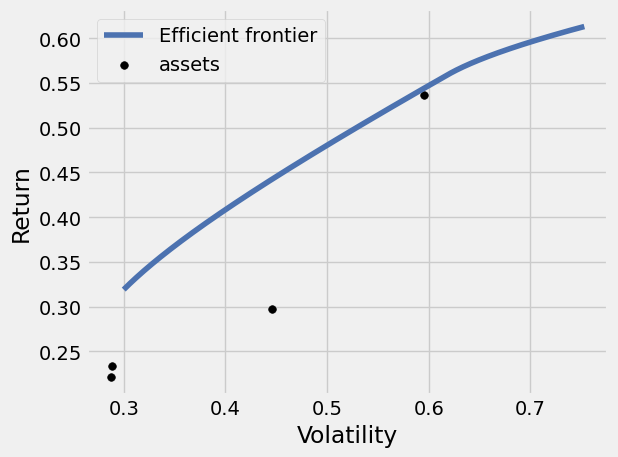

OrderedDict([('AMD', 0.32181), ('NFLX', 0.14849), ('AAPL', 0.29893), ('GOOG', 0.23076)])
Expected annual return: 33.8%
Annual volatility: 31.8%
Sharpe Ratio: 1.00


(0.3378306520417936, 0.3176995483643331, 1.0004126656085457)

In [ ]:
# Import necessary libraries
from pypfopt import expected_returns, risk_models
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting
import numpy as np

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum Sharpe ratio
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_constraint(lambda w: w[0] + w[1] + w[2] + w[3] == 1)

# Plot efficient frontier with risk on x-axis
risk_range = np.linspace(0.30, 0.80, 1000)
plotting.plot_efficient_frontier(ef, ef_param="risk", ef_param_range=risk_range, show_assets=True, showfig=True)

# Create a new instance of EfficientFrontier before calling max_sharpe()
ef_new = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef_new.add_constraint(lambda w: w[0] + w[1] + w[2] + w[3] == 1)

# Optimize for maximum Sharpe ratio using the new instance
weights = ef_new.max_sharpe()
cleaned_weights = ef_new.clean_weights()
print(cleaned_weights)
ef_new.portfolio_performance(verbose=True)


In [ ]:
# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)


<Axes: xlabel='Volatility', ylabel='Return'>

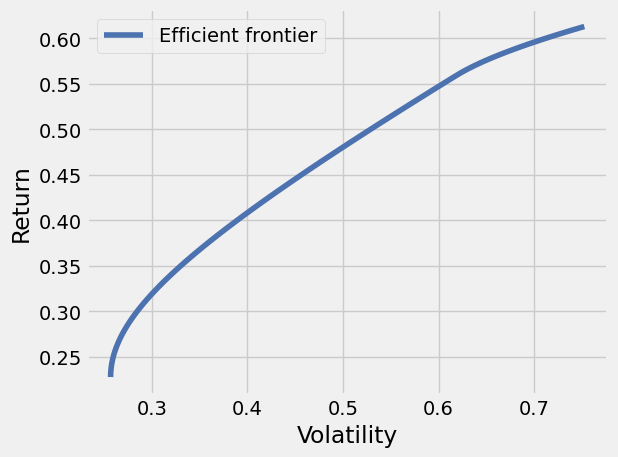

In [ ]:
# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

In [ ]:
# Find the tangency portfolio
ef_new = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef_new.add_constraint(lambda w: w[0] + w[1] + w[2] + w[3] == 1)

# Optimize for maximum Sharpe ratio using the new instance
weights_tangent = ef_new.max_sharpe()
ret_tangent, std_tangent, _ = ef_new.portfolio_performance()

# Scatter plot of tangency portfolio
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")


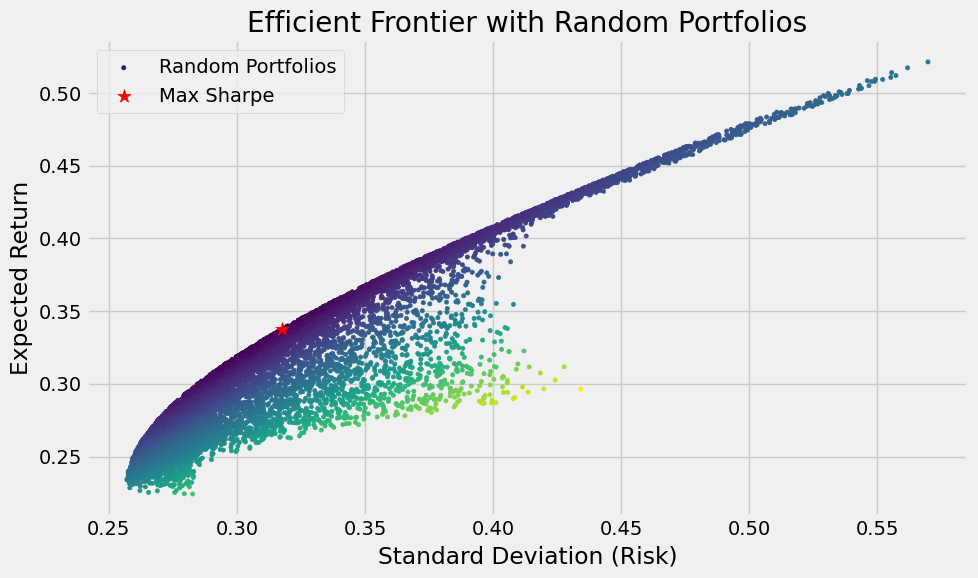

In [ ]:
# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r", label="Random Portfolios")

# Plot the tangency portfolio
plt.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Additional plot configurations
plt.title("Efficient Frontier with Random Portfolios")
plt.xlabel("Standard Deviation (Risk)")
plt.ylabel("Expected Return")
plt.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()


**Random Portfolios Scatter Plot:**

This plot displays the distribution of random portfolios generated by randomly allocating weights to the stocks in the portfolio.
Each point represents a random portfolio, with the x-coordinate indicating its risk (standard deviation) and the y-coordinate indicating its return.
The scatter plot helps investors understand the range of possible portfolios and their associated risk-return characteristics.